### Geospatial Data Analysis in Python

In [1]:
# !pip install osmnx
# !pip install folium
# !pip install keplergl

In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import folium
from keplergl import KeplerGl

/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
place_name = "Altstadt, Zurich, Switzerland"

graph = ox.graph_from_place(place_name)

ox.plot_graph_folium(graph)

In [4]:
area = ox.geocode_to_gdf(place_name)
area.head()

geometry  bbox_north  bbox_south  \
0  POLYGON ((8.52921 47.36921, 8.52999 47.36857, ...    47.38297   47.363206   

   bbox_east  bbox_west   place_id  osm_type   osm_id        lat       lon  \
0     8.5508   8.529205  297424186  relation  1693096  47.372233  8.542329   

                                        display_name     class  \
0  Kreis 1, Zurich, District Zurich, Zurich, 8001...  boundary   

             type  importance  
0  administrative    0.552702

<AxesSubplot: >

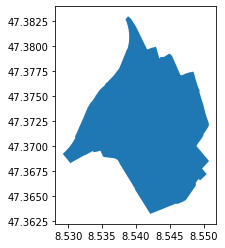

In [5]:
area.plot()

<AxesSubplot: >

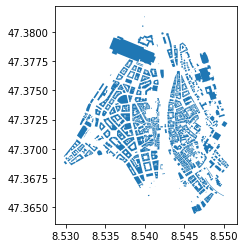

In [6]:
buildings = ox.geometries_from_place(place_name, tags={'building':True})
buildings.plot()

<AxesSubplot: >

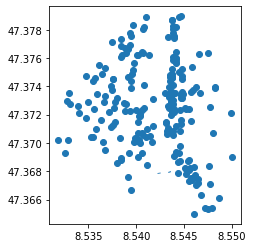

In [7]:
restaurants = ox.geometries_from_place(place_name, tags={"amenity": "restaurant"})
restaurants.plot()

<AxesSubplot: >

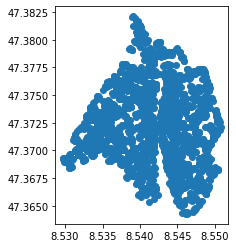

In [8]:
nodes, edges = ox.graph_to_gdfs(graph)
nodes.plot()

<AxesSubplot: >

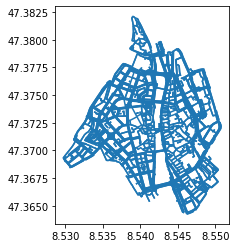

In [9]:
edges.plot()

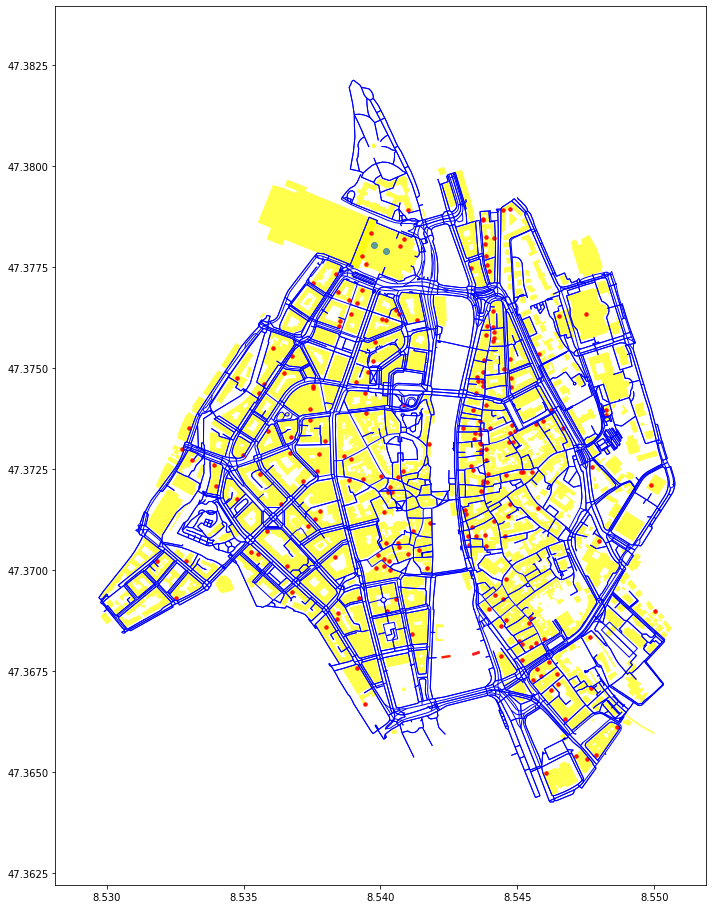

In [10]:
fig, ax = plt.subplots(figsize=(10, 14))
area.plot(ax=ax, facecolor='white')
edges.plot(ax=ax, linewidth=1, edgecolor='blue')
buildings.plot(ax=ax, facecolor='yellow', alpha=0.7)
restaurants.plot(ax=ax, color='red', alpha=0.9, markersize=12)
plt.tight_layout()

In [11]:
it_resturants = restaurants.loc[restaurants.cuisine.str.contains('italian').fillna(False)].dropna(axis=1, how='all')
it_resturants.columns

Index(['access:covid19', 'addr:city', 'addr:country', 'addr:housenumber',
       'addr:postcode', 'addr:street', 'amenity', 'email', 'name',
       'opening_hours', 'opening_hours:covid19', 'outdoor_seating', 'phone',
       'toilets:wheelchair', 'website', 'wheelchair', 'geometry', 'wikidata',
       'cuisine', 'operator', 'air_conditioning', 'takeaway', 'branch',
       'level', 'opening_hours:kitchen', 'alt_name', 'brand', 'brand:wikidata',
       'oven', 'indoor_seating', 'smoking', 'delivery', 'start_date',
       'changing_table', 'contact:email', 'contact:fax', 'contact:phone',
       'contact:website', 'highchair', 'toilets', 'toilets:access'],
      dtype='object')

In [12]:
K_map = KeplerGl()
K_map.add_data(data=restaurants, name='Restaurants')
K_map.add_data(data=buildings, name='Buildings')
K_map.add_data(data=edges, name='Edges')
K_map.add_data(data=area, name='Area')
K_map.save_to_html()

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to keplergl_map.html!


In [13]:
resturant_choice = it_resturants[it_resturants['name'] == 'Antica Roma']
orig = list(graph)[993]
nodes[nodes.index == orig]

y         x  street_count highway  ref  \
osmid                                                        
1787929087  47.376746  8.546252             3     NaN  NaN   

                            geometry  
osmid                                 
1787929087  POINT (8.54625 47.37675)

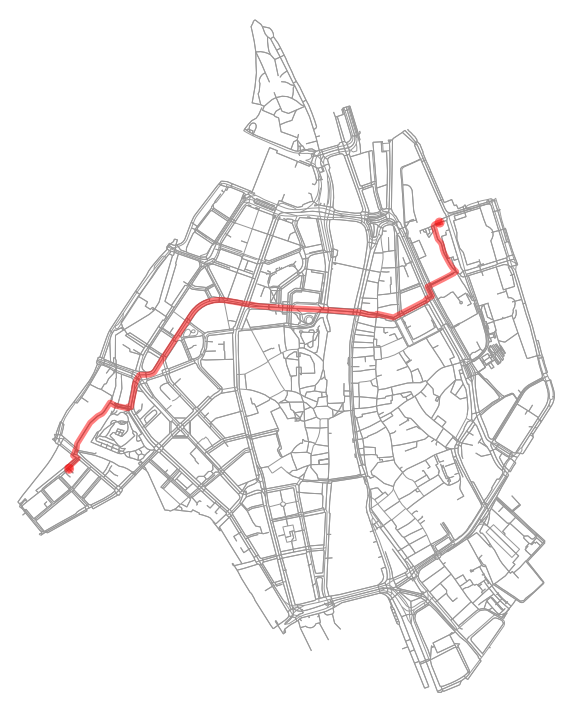

In [14]:
dest = ox.nearest_nodes(graph, resturant_choice['geometry'][0].xy[0][0], resturant_choice['geometry'][0].xy[1][0])
route = nx.shortest_path(graph, orig, dest, weight='length')
fig, ax = ox.plot_graph_route(graph, route, route_linewidth=6, node_size=0, bgcolor='w', figsize=(10, 14))

In [15]:
ox.plot_route_folium(graph, route, route_linewidth=6, node_size=0)